<a href="https://colab.research.google.com/github/vortexash/Tensorflow-Developer/blob/main/Decision_Tree_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import math
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [28]:
def gini(samples):
  sample_sum = sum(samples)
  score = 0
  probas = []
  for sample in samples:
    proba = sample / sample_sum
    probas.append(proba)
  for proba in probas:
    score += proba * (1 - proba)
  return score

In [12]:
def entropy(sample):
  sample_sum = sum(samples)
  score = 0
  probas = []
  for sample in samples:
    proba = sample / sample_sum
    probas.append(proba)
  for proba in probas:
    if proba > 0:
      score += proba * math.log(proba)
  return -1 * score

In [13]:
samples =[100, 75, 125]
gini(samples),entropy(samples)

(0.6527777777777777, 1.0775563270668007)

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/jorisvandenbossche/pandas-tutorial/master/data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data = data[["Survived", "Pclass", "Sex"]]

In [18]:
sex_mapping = {
    "female":0,
    "male": 1
}
data.Sex = data.Sex.map(sex_mapping)
data.head()

,Survived,Pclass,Sex
0,0,3,1
1,1,1,0
2,1,3,0
3,1,1,0
4,0,3,1


In [19]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [29]:
gini([549, 342])

0.4730129578614427

In [30]:
data[data.Pclass <=1.5].Survived.value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [49]:
# True Condition
x = data[(data.Sex <=0.5) & (data.Pclass <= 2.5)]
print(x.shape)
print(x.Survived.value_counts())

(170, 3)
1    161
0      9
Name: Survived, dtype: int64


In [50]:
gini([9, 161])

0.10027681660899657

In [51]:
# False condition
x = data[(data.Sex <=0.5) & (data.Pclass > 2.5)]
print(x.shape)
print(x.Survived.value_counts())

(144, 3)
1    72
0    72
Name: Survived, dtype: int64


In [52]:
gini([72, 72])

0.5

In [54]:
   features =["Sex", "Pclass" ]
   model = DecisionTreeClassifier()
   model.fit(data[features], data.Survived)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

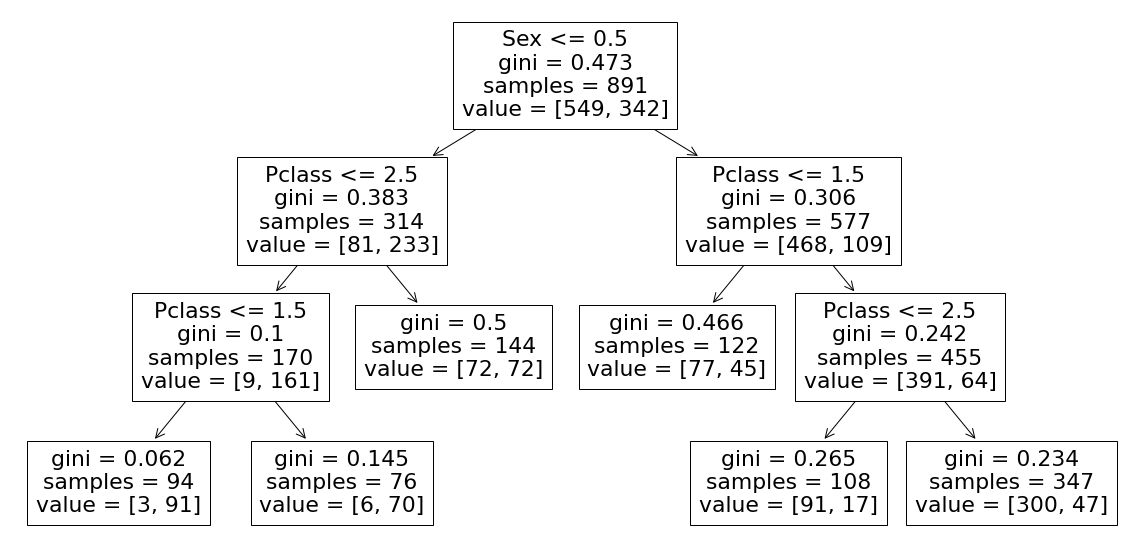

In [56]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names = features)
plt.show()